In [2]:
import numpy as np
from numpy import load
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt    
import scipy.io as sio
from random import randint
import seaborn as sns
from matplotlib.pyplot import imshow

In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv("mnist_train.csv")

In [5]:
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
'''
use df.loc for splitting df in a dataframe with the training set values (784)
and in a dataframe containing only the labels (from 0 to 9)
'''
df_train = df.loc[:, (df.columns!='label')]
df_train = df_train.loc[:, df_train.columns!='names']
df_train_label = df.loc[:, df.columns=='label']

'''
assign the two dataframes to the two numpy.ndarray arrays X for the training
and y for the labels
'''

X = df_train.values
y = np.int64(df_train_label.values.flatten())

In [7]:
len(X)

60000

In [8]:
len(X[0])

784

In [9]:
X[0][1:250]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18, 126,
       136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170, 25

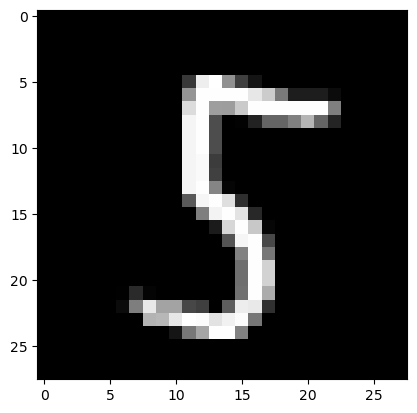

In [10]:
'''
Reshape a 784-values vector extracted from one of the images
stored in the vector X (#3500) which represents a digit "six".
Use the NumPy method .reshape, specifiying the double argument '28'
then show the image with the function imshow, specifying the cmap='gray'
'''

image = X[3500].reshape(28,28)
imshow(image, cmap='gray')

In [11]:
y

array([5, 0, 4, ..., 5, 6, 8], dtype=int64)

In [12]:
type(y)

numpy.ndarray

In [14]:
# Function for visualizing fifty randomly picked digits, from the dataset

def plotSamplesRandomly(X, y):

    # create a list of randomly picked indexes.
    # the function randint creates the list, picking numbers in a 
    # range 0-42000, which is the length of X

    randomSelect = [randint(0, len(X)) for i in range(0, 51)]

    # reshape all the pictures on the n X n pixels, 
    # where n = sqrt(size of X), in this case 28 = sqrt(784)
    w, h =int(np.sqrt(X.shape[1])), int(np.sqrt(X.shape[1]))
    fig=plt.figure(figsize=(int(np.sqrt(X.shape[1])), int(np.sqrt(X.shape[1]))))
  
    # Define a grid of 10 X 10 for the big plot. 
    columns = 10
    rows = 10

    # The for loop
    for i in range(1, 51):
  
        # create the 2-dimensional picture
        image = X[randomSelect[i]].reshape(w,h)
        ax = fig.add_subplot(rows, columns, i)

        # create a title for each pictures, containing #index and label
        title = "#"+str(randomSelect[i])+"; "+"y="+str(y[randomSelect[i]])

        # set the title font size
        ax.set_title(title, fontsize=20)        

        # don't display the axis
        ax.set_axis_off()
        
        # plot the image in grayscale
        plt.imshow(image, cmap='gray')

    plt.show()

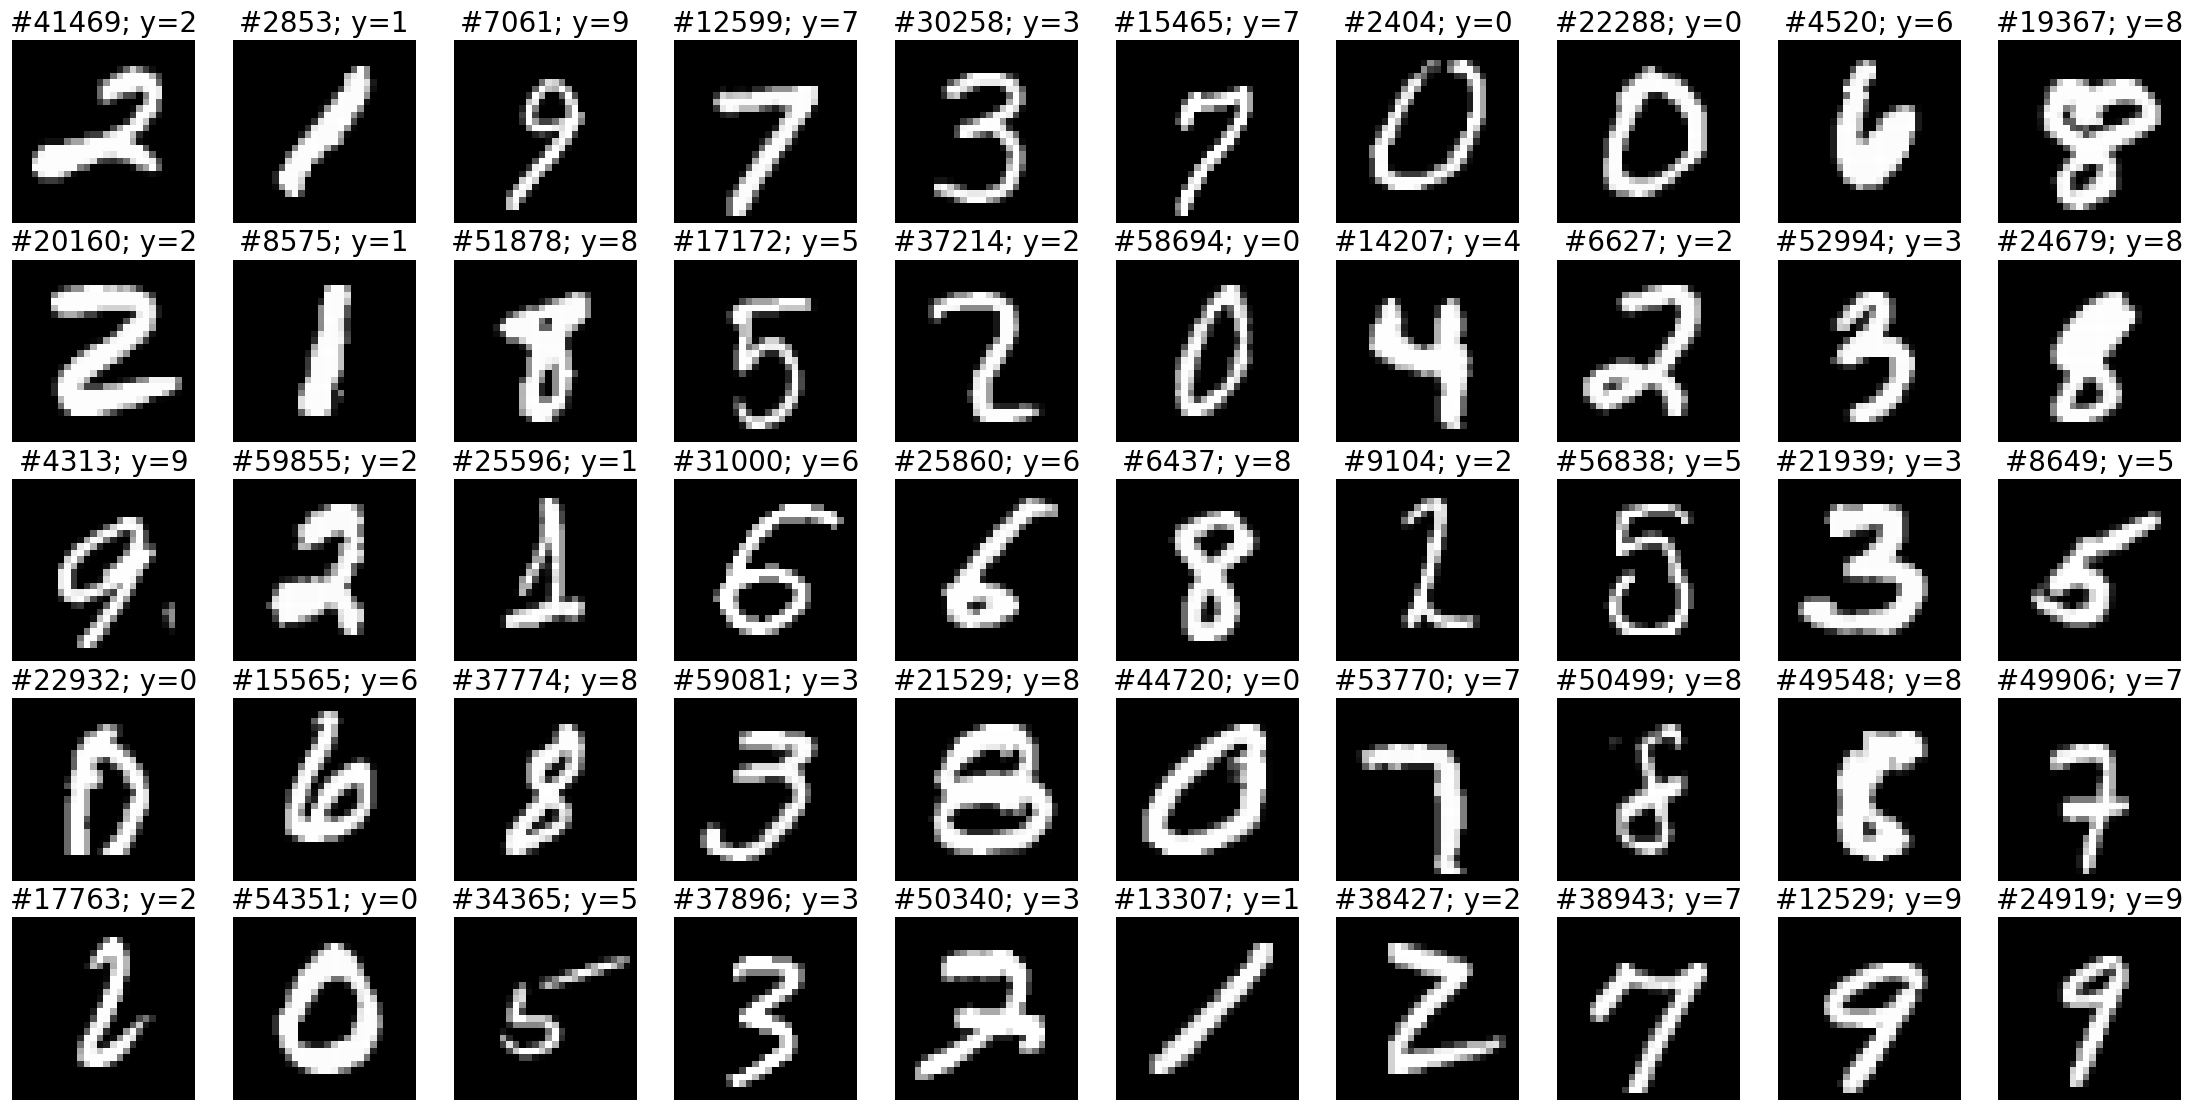

In [15]:
plotSamplesRandomly(X,y)